# **fastText**
- fastTextは2016年にFacebookが公開した自然言語処理ライブラリ。単語をベクトル化することによって単語間の距離を計算し、コンピューター上での言葉の処理を可能にしたWord2Vec（Googleが開発）というライブラリがベース。100～300次元のベクトル生成が高速化され、さらにはテキストの分類も高速で行える特徴がある。
- fastTextの使用は学習モデルが必要。自らデータ収集し、学習させるか、学習済モデルを使う。


---


- 以下は、この [**学習済モデル：NEologd**](https://drive.google.com/file/d/0ByFQ96A4DgSPUm9wVWRLdm5qbmc/view?resourcekey=0-of5Ks1fuoKNh1pEYE8uSFQ) を利用し、類似語抽出、単語の加減算や複数単語の類似度、類似語の分布をグラフ表示させることができる。
- 学習モデルをダウンロードし、GoogleDriveに保存（初回のみ）、実行すると（最初のセルで）URLへのアクセスが要求されるのでアクセスしログイン。表示されるauthorization codeをコピーし、セルに表示される [ Enter your authorization code: ] の入力枠にコピペ⏎するだけです。
- 学習済モデルの保存フォルダの初期設定は「/content/drive/My Drive/NLP」です。変更の場合は任意に設定してください。
- 類似語、加算、減算、加減算等、文字を書き換え、セルを実行してください。

# **学習済モデル & ライブラリインポート**
**<font color= "LightCoral">※GoogleDriveログイン要求あり</font>**

In [1]:
#GoogleDriveへのアクセス
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#学習済モデル保存フォルダ指定
%cd /content/drive/My Drive/NLP
#!unzip vector_neologd.zip     #vector_neologd.zipを解凍する場合（Driveにmodel.vecを配置する場合は不要）

/content/drive/My Drive/NLP


In [3]:
#ライブラリのインポート
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('model.vec', binary=False)
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# **Simulation**
- **類似語**、**加算**、**減算**、**加減算**、**類似度計算**を行う。
- 類似度＝**cos類似度**。2つのベクトルがどれだけ同じ方向を向いているか(類似しているか)を数値化したもの。cos類似度が0のときは類似度が低く、1のときには類似度が高い。

## **類似語**

In [4]:
model.most_similar(positive=['自然言語処理'])

[('自然言語理解', 0.7600098848342896),
 ('自然言語', 0.7503659725189209),
 ('計算言語学', 0.7258570194244385),
 ('自動プログラミング', 0.6848069429397583),
 ('テキストマイニング', 0.6811494827270508),
 ('コンピュータ言語', 0.6618390083312988),
 ('メタプログラミング', 0.658093273639679),
 ('Webプログラミング', 0.6488876342773438),
 ('形態素解析', 0.6479052901268005),
 ('コーパス言語学', 0.6465639472007751)]

In [5]:
model.most_similar(positive=[u'指原莉乃'])

[('指原', 0.6906553506851196),
 ('AKB48', 0.6720197796821594),
 ('HKT48', 0.6718469858169556),
 ('HKT48メンバー', 0.6542617082595825),
 ('AKB48メンバー', 0.6478071212768555),
 ('篠田麻里子', 0.6383055448532104),
 ('北原里英', 0.6364010572433472),
 ('松井玲奈', 0.6348026394844055),
 ('小嶋陽菜', 0.6268848180770874),
 ('松村香織', 0.6150707006454468)]

In [6]:
model.most_similar(positive=['指原莉乃'])

[('指原', 0.6906553506851196),
 ('AKB48', 0.6720197796821594),
 ('HKT48', 0.6718469858169556),
 ('HKT48メンバー', 0.6542617082595825),
 ('AKB48メンバー', 0.6478071212768555),
 ('篠田麻里子', 0.6383055448532104),
 ('北原里英', 0.6364010572433472),
 ('松井玲奈', 0.6348026394844055),
 ('小嶋陽菜', 0.6268848180770874),
 ('松村香織', 0.6150707006454468)]

In [7]:
model.most_similar(positive=['矛盾'])

[('解釈', 0.5725398659706116),
 ('依拠', 0.5721194744110107),
 ('事実', 0.5694482326507568),
 ('論理展開', 0.566437304019928),
 ('帰結', 0.5617071390151978),
 ('整合性', 0.5612446665763855),
 ('相容れない', 0.555274486541748),
 ('相反', 0.5549651980400085),
 ('論理的', 0.5514503717422485),
 ('擬似問題', 0.5508006811141968)]

## **加算**

In [8]:
model.most_similar(positive=['公務員','ピストル'])

[('拳銃', 0.6722265481948853),
 ('警察官', 0.645647406578064),
 ('ライフル', 0.5871104001998901),
 ('税関職員', 0.5805060863494873),
 ('国家公務員', 0.5700550079345703),
 ('地方公務員', 0.5679237842559814),
 ('回転式拳銃', 0.555571973323822),
 ('警察', 0.5519983768463135),
 ('銃', 0.5454484224319458),
 ('サブマシンガン', 0.5393073558807373)]

In [9]:
model.most_similar(positive=['漫才','コント'])

[('ネタ', 0.761521577835083),
 ('ショートコント', 0.7550157308578491),
 ('芸人', 0.7290821671485901),
 ('漫談', 0.7184947729110718),
 ('ギャグ', 0.7108776569366455),
 ('漫才師', 0.7088689208030701),
 ('お笑い芸人', 0.6957459449768066),
 ('お笑い', 0.6939573287963867),
 ('お笑い三人組', 0.6899967789649963),
 ('太平サブロー・シロー', 0.6796971559524536)]

In [10]:
model.most_similar(positive=['松本人志','浜田雅功'])

[('明石家さんま', 0.7072478532791138),
 ('島田紳助', 0.6964879035949707),
 ('ダウンタウンDX', 0.6814934015274048),
 ('今田耕司', 0.6808367371559143),
 ('ダウンタウンのごっつええ感じ', 0.6798076033592224),
 ('ビートたけし', 0.674322247505188),
 ('アンジャッシュ', 0.6675422787666321),
 ('中居正広', 0.6580966711044312),
 ('水曜日のダウンタウン', 0.6557024121284485),
 ('関根勤', 0.6515215635299683)]

## **減算**

In [11]:
model.most_similar(positive=['友人'], negative=['友情'])

[('知人', 0.4586910605430603),
 ('自宅', 0.35488438606262207),
 ('知り合い', 0.329221248626709),
 ('入り浸り', 0.3212822675704956),
 ('親戚', 0.31865695118904114),
 ('知り合っ', 0.3158203959465027),
 ('宅', 0.31503963470458984),
 ('誘わ', 0.302945077419281),
 ('繁く', 0.30250048637390137),
 ('同僚', 0.29792869091033936)]

In [12]:
model.most_similar(positive=[u'悪魔'], negative=[u'悪'])

[('悪魔学', 0.3191366195678711),
 ('リリス', 0.3078289031982422),
 ('マリオン', 0.30256831645965576),
 ('コラン・ド・プランシー', 0.30058354139328003),
 ('あくま', 0.29533228278160095),
 ('ルチア', 0.2935662269592285),
 ('ジョルジア', 0.29219090938568115),
 ('悪魔祓い', 0.29145145416259766),
 ('悪魔の偽王国', 0.2878120243549347),
 ('ケツァル', 0.2845156788825989)]

In [13]:
model.most_similar(positive=['天使'], negative=['愛'])

[('大天使', 0.41006675362586975),
 ('堕天使', 0.3741123676300049),
 ('悪魔', 0.3442612588405609),
 ('座天使', 0.34181511402130127),
 ('四大天使', 0.3348194658756256),
 ('ゴエティア', 0.3319788873195648),
 ('守護天使', 0.327433705329895),
 ('熾天使', 0.3230840861797333),
 ('使徒', 0.3035411834716797),
 ('使い魔', 0.30224302411079407)]

## **加減算**

In [14]:
model.most_similar(positive=['王様','女'], negative=['男'])

[('王女', 0.5453721284866333),
 ('王妃', 0.491094708442688),
 ('ミュセドーラス', 0.4875587224960327),
 ('お姫様', 0.4848765432834625),
 ('妖精の王', 0.4837903678417206),
 ('王様の剣', 0.481453537940979),
 ('魔女', 0.4802400767803192),
 ('魔法使い', 0.47873038053512573),
 ('チェネレントラ', 0.4779035449028015),
 ('マダム', 0.47390395402908325)]

In [15]:
model.most_similar(positive=[u'イチロー',u'サッカー'], negative=[u'野球'])

[('ライアン・ギグス', 0.5984222888946533),
 ('中村俊輔', 0.566627562046051),
 ('ジネディーヌ・ジダン', 0.5604873895645142),
 ('ティエリ・アンリ', 0.5599821209907532),
 ('リオネル・メッシ', 0.5598835945129395),
 ('中山雅史', 0.5466797351837158),
 ('日本人サッカー選手', 0.5457726716995239),
 ('内田篤人', 0.5445243120193481),
 ('ルート・ファン・ニステルローイ', 0.543231189250946),
 ('三浦知良', 0.5400798320770264)]

## **類似度**

In [16]:
print(model.similarity('猫', '犬'))
print(model.similarity('猫', '人'))

0.7270735
0.32024506


# **複数単語の類似度分布**

### **日本語化**

In [17]:
#matplotlib日本語化
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 8.0 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120274 sha256=6a3dbd1aba1a8006d88efded6e9a9631181ffc266b3240658176175ea3ae0e96
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


### **類似度分布が確認したい複数単語設定**

In [18]:
tags = ['Python', '機械学習', '自然言語', 'AI']

### **モデル構築**

In [19]:
import numpy as np

# 単語の類似語とベクトルを返す
def similars(words, model):
    vectors = []
    cluster = []
    label = []
    for i in range(len(tags)):
        tag = tags[i]
        similar = model.similar_by_word(tag, topn=10)
        for x in similar:
            cluster.append(i)
            label.append(tag)
            vectors.append(model[x[0]])
    return vectors, cluster, label

vectors, cluster, label = similars(tags, model)

# ベクトルの次元を確認
#print(np.array(words).shape)
#print(np.array(cluster).shape)
#print(np.array(vectors).shape)

In [21]:
# similar‗words list作成 (dict type)
similar_words = []
for tag in tags:
    try:
        similar_word = model.most_similar(tag)
        for i in range(10):
            similar = {}
            similar['tag'] = tag
            similar['similar_tag'] = similar_word[i][0]
            similar['score'] = similar_word[i][1]
            similar_words.append(similar)
    except:
        pass

#similar_wordsデータフレーム化&表示
df_similar = pd.DataFrame.from_dict(similar_words)
df_similar

,tag,similar_tag,score
0,Python,CPython,0.886935
1,Python,IronPython,0.851187
2,Python,Jython,0.841912
3,Python,C言語,0.746309
4,Python,Perl,0.741926
5,Python,Java,0.732572
6,Python,JavaScript,0.724557
7,Python,C++,0.719751
8,Python,スクリプト言語,0.714903
9,Python,Ruby,0.712240


In [22]:
#可視化モジュール（t-SNEはコメントアウト：適用する場合は#設定をPCAと変更）
from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import japanize_matplotlib

def draw_scatter_plot(vectors, words, cluster):

    colors = ["b", "g", "r", "c", "m", "y", "k"]

    # PCAで次元圧縮
    pca = PCA(n_components=2)
    coords = pca.fit_transform(vectors)

    # t-SNEで次元圧縮
    #tsne = TSNE(n_components=2, random_state=0)
    #np.set_printoptions(suppress=True)
    #coords = tsne.fit_transform(vectors)

    # matplotlibによる可視化
    plt.rcParams["font.size"] = 12
    fig, ax = plt.subplots(figsize=(10,10))
    x = [v[0] for v in coords]
    y = [v[1] for v in coords]

    for i in range(len(tags)):
        xx = []
        yy = []
        for c, a, b in zip(cluster, x, y):
            if i == c:
                xx.append(a)
                yy.append(b)
        ax.scatter(xx, yy, c=colors[i % 7], label=tags[i])
    ax.legend(loc='upper right')

    for j in range(len(df_similar['similar_tag'])):
        ax.plot(coords[j][0], coords[j][1], marker='')
        ax.annotate(df_similar['similar_tag'][j],(coords[j][0], coords[j][1]))

    plt.show()

### **複数単語の類似度可視化‗PCA**

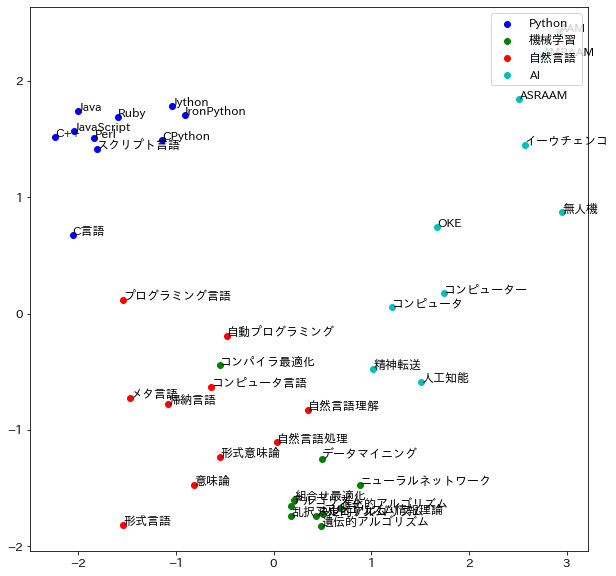

In [23]:
draw_scatter_plot(vectors, tags, cluster)

# **類似語分布**

### **モデル構築**

In [27]:
def draw_word_scatter(word, topn=30):

    # 類似語抽出
    words = [x[0] for x in sorted(model.most_similar(word, topn=topn))]

    vecs = []
    # 各単語のベクトル表現  
    for word in words:
        vec = model.wv[word]
        vecs.append(vec)
        
    # PCAで次元圧縮
    pca = PCA(n_components=2)
    coords = pca.fit_transform(vecs)
    
    # matplotlibによる可視化
    plt.rcParams["font.size"] = 12
    fig, ax = plt.subplots(figsize=(10, 10))
    x = [v[0] for v in coords]
    y = [v[1] for v in coords]
    
    ax.scatter(x, y)
    
    for i, txt in enumerate(words):
        ax.annotate(txt, (coords[i][0], coords[i][1]))

    plt.show()

### **類似語を可視化したい単語設定**

In [25]:
word = ['機械学習']

### **類似語設定とグラフ化‗PCA**



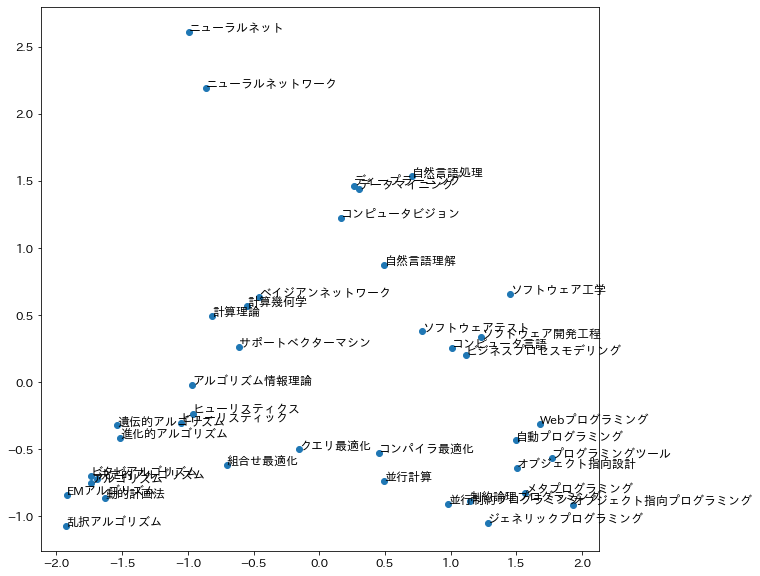

In [28]:
draw_word_scatter(word,40)

# **備考**
- [学習済みの日本語単語ベクトルをColabolatoryで試してみる](https://www.suzu6.net/posts/281-fasttext-in-colabolatory/)
- [学習済みWord2Vec モデルをサクッと使ってみる](http://cedro3.com/ai/word2vec-gensim/)
- [fastTextでサクッと単語の分散表現を使ってみよう！](https://qiita.com/MonaCat/items/c26fa660a711f010c39a)
- [【word2vec】会社のクチコミを自然言語処理した結果を可視化してみる](https://qiita.com/naotaka1128/items/e617f63907fed035408a)